In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

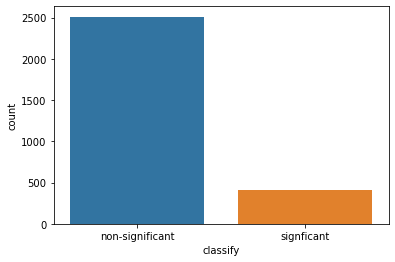

In [41]:
df2 = pd.read_csv('result_for_plot.csv',sep=',')
result1 = pd.DataFrame()
# 计算-log10 (P value)
result1['lgp']= -np.log10(df2['U test'])
result1['logfc']= df2['MEAN']
# 根据 lgp 分为 'non-signficant' 和 'significant' 两类
result1['classify'] = 'non'
result1['genename']=df2['Gene name']
result1.loc[result1.lgp <=1,'classify'] = 'non-significant'
result1.loc[result1.lgp >1,'classify'] = 'signficant'
sns.countplot(data = result1, x= 'classify')
plt.savefig('barplot1.png')

C:\Users\25944\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\25944\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\25944\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

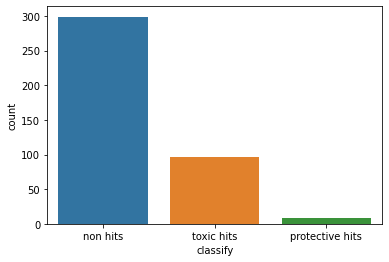

In [42]:
result2 = result1[result1.lgp >1]
# 根据 logfc 分为 'Non hits', 'Protective hits'和'Toxic hits'三组
result2.loc[(result2.logfc >0.5),'classify'] = 'protective hits'
result2.loc[(result2.logfc < -0.5),'classify'] = 'toxic hits'
result2.loc[(result2.logfc <=0.5)&(result2.logfc >= -0.5),'classify'] = 'non hits'
sns.countplot(data = result2, x='classify')
plt.savefig('barplot2.png')